In [1]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from grr.pltools import hide_border

In [2]:
plt.style.use(os.path.join('..', '..', 'figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
plt.rc('text', usetex = False)
IMG_PATH = os.path.join('..', '..', 'figs', 'ims', 'GIF_individuals')

# Benchmarks

In [3]:
benchmarks = {}
for celltype in ['5HT', 'GABA', 'mPFC']:
    benchmarks[celltype] = {
        'Md': pd.read_csv('{}_goodcellsbenchmark_Md_8.csv'.format(celltype)),
        'R2V': pd.read_csv('{}_goodcellsbenchmark_R2_V.csv'.format(celltype)),
        'R2dV': pd.read_csv('{}_goodcellsbenchmark_R2_dV.csv'.format(celltype))
    }

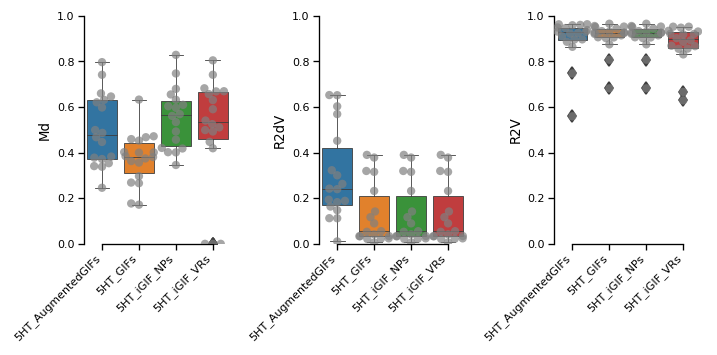

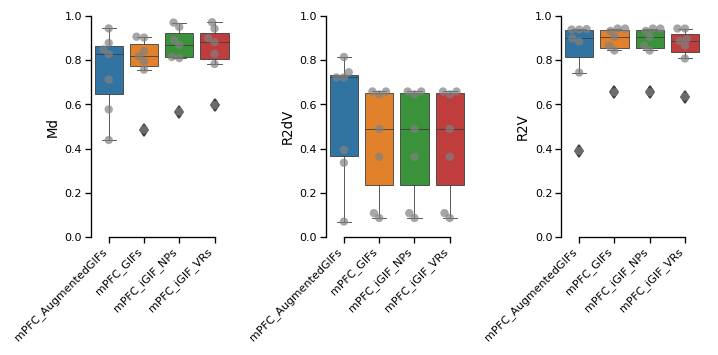

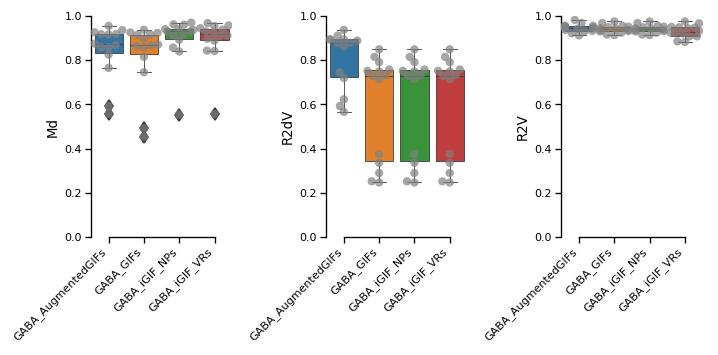

In [4]:
for celltype in benchmarks:
    fig, axes = plt.subplots(1, 3, figsize=(6, 3))
    axes = axes.flatten().tolist()
    
    for i, benchtype in enumerate(benchmarks[celltype]):
        axes[i].set_ylim(0, 1)
        chart = sns.boxplot(
            x='variable', y='value', data=benchmarks[celltype][benchtype].melt(id_vars=['Cell']), 
            ax=axes[i]
        )
        sns.swarmplot(
            x='variable', y='value', data=benchmarks[celltype][benchtype].melt(id_vars=['Cell']), 
            ax=axes[i], color='gray', alpha=0.7
        )
        axes[i].set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
        axes[i].set_ylabel(benchtype)
        axes[i].set_xlabel('')
    
    sns.despine(trim=True)
    plt.tight_layout()

## Selected benchmarks

Most important benchmarks for presentations, etc.

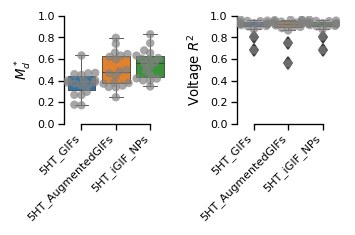

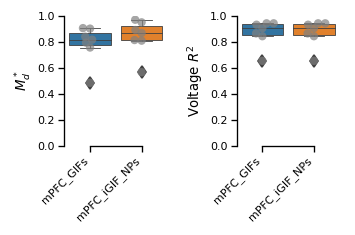

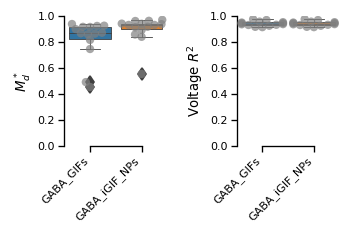

In [5]:
selected_mods = {
    '5HT': ['5HT_GIFs', '5HT_AugmentedGIFs', '5HT_iGIF_NPs'],
    'GABA': ['GABA_GIFs', 'GABA_iGIF_NPs'],
    'mPFC': ['mPFC_GIFs', 'mPFC_iGIF_NPs']
}
for celltype in benchmarks:
    fig, axes = plt.subplots(1, 2, figsize=(3, 2))
    axes = axes.flatten().tolist()
    
    for i, benchtype in enumerate(['Md', 'R2V']):
        cols = ['Cell']
        cols.extend(selected_mods[celltype])
        data_filtered = benchmarks[celltype][benchtype].loc[:, cols]
        
        axes[i].set_ylim(0, 1)
        chart = sns.boxplot(
            x='variable', y='value', data=data_filtered.melt(id_vars=['Cell']), 
            ax=axes[i]
        )
        sns.swarmplot(
            x='variable', y='value', data=data_filtered.melt(id_vars=['Cell']), 
            ax=axes[i], color='gray', alpha=0.7
        )
        axes[i].set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
        axes[i].set_ylabel(benchtype)
        axes[i].set_xlabel('')
    
    axes[0].set_ylabel('$M_d^*$')
    axes[1].set_ylabel('Voltage $R^2$')
    
    sns.despine(trim=True)
    plt.tight_layout()
    
    if IMG_PATH is not None:
        plt.savefig(os.path.join(IMG_PATH, '{}_selected_benchmarks.png'.format(celltype)))

# Sample traces

In [6]:
sample_traces = {}
for celltype in ['GABA', '5HT', 'mPFC']:
    with open(
        os.path.join(
            '..', '..', 'data', 'models', celltype, '{}_goodcellsbenchmark_sample_traces.pkl'.format(celltype)
        ), 'rb'
    ) as f:
        sample_traces[celltype] = pd.DataFrame(pickle.load(f))
        f.close()

In [7]:
sample_traces['5HT'].head()

,5HT_AugmentedGIFs,5HT_GIFs,5HT_iGIF_NPs,5HT_iGIF_VRs,Cell,Data,Input,Time
0,"{u'V': [-62.442738973975736, -62.4440465840488...","{u'V': [-62.442738973975736, -62.4445338678523...","{u'V': [-62.442738973975736, -62.4445338678523...","{u'V': [-62.442738973975736, -62.4445338677904...",DRN307,"{u'V': [-62.442738973975736, -62.4416444000009...","[0.00042724612285383046, 0.00048828125, 0.0001...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
1,"{u'V': [-66.37741100673298, -66.37665311982124...","{u'V': [-66.37741100673298, -66.3777695946788,...","{u'V': [-66.37741100673298, -66.3777695946788,...","{u'V': [-66.37741100673298, -66.37776959504522...",DRN308,"{u'V': [-66.37741100673298, -66.2586901343628,...","[0.01837158203125, 0.01849365234375, 0.0180664...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
2,"{u'V': [-54.20709173457228, -54.20887935365547...","{u'V': [-54.20709173457228, -54.21028497588352...","{u'V': [-54.20709173457228, -54.21028497588352...","{u'V': [-54.20709173457228, -54.2102849760596,...",DRN317,"{u'V': [-54.20709173457228, -54.34448766977888...","[0.02050781436264515, 0.02020263858139515, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
3,"{u'V': [-50.29631265467266, -50.29832644043723...","{u'V': [-50.29631265467266, -50.30323297837982...","{u'V': [-50.29631265467266, -50.30323297837982...","{u'V': [-50.29631265467266, -50.30323297824611...",DRN318,"{u'V': [-50.29631265467266, -50.29306872022119...","[0.015441895462572575, 0.015441895462572575, 0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."
4,"{u'V': [-55.92819569399345, -55.93336731055516...","{u'V': [-55.92819569399345, -55.93870641430605...","{u'V': [-55.92819569399345, -55.93870641430605...","{u'V': [-55.92819569399345, -55.93870641428965...",DRN319,"{u'V': [-55.92819569399345, -56.09175514375625...","[-0.014465332962572575, -0.014831543900072575,...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,..."


In [8]:
def sample_trace_plot(trace_df, xlims, model_type, model_label, model_color, fname=None):
    
    sample_tr_spec = gs.GridSpec(4, 1, height_ratios=[0.2, 1, 0.3, 0.3])
    
    plt.figure(figsize=(3, 2))
    
    plt.subplot(sample_tr_spec[0, :])
    plt.plot(
        trace_df.loc[i, 'Time'], 
        trace_df.loc[i, 'Input'], 
        color='gray'
    )
    plt.ylabel('I (nA)')
    plt.xticks([])
    plt.xlim(xlims)
    sns.despine(trim=True, ax=plt.gca(), bottom=True)
    
    plt.subplot(sample_tr_spec[1, :])
    plt.plot(
        trace_df.loc[i, 'Time'], 
        trace_df.loc[i, 'Data']['V'], 
        color='black', label='Real neuron'
    )
    plt.plot(
        trace_df.loc[i, 'Time'], 
        trace_df.loc[i, model_type]['V'], 
        color=model_color, alpha=0.7, label=model_label
    )
    plt.xticks([])
    plt.xlim(xlims)
    sns.despine(trim=True, ax=plt.gca(), bottom=True)
    plt.ylabel('V (mV)')
    plt.legend()
    
    plt.subplot(sample_tr_spec[2, :])
    plt.eventplot(trace_df.loc[i, 'Data']['spks'], color='black')
    plt.xticks([])
    plt.xlim(xlims)
    sns.despine(trim=True, ax=plt.gca(), bottom=True)
    
    plt.subplot(sample_tr_spec[3, :])
    plt.eventplot(trace_df.loc[i, model_type]['spks'], color=model_color)
    plt.xlim(xlims)
    sns.despine(trim=True, ax=plt.gca())
    plt.xlabel('Time (ms)')
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.1)
    
    if IMG_PATH is not None and fname is not None:
        plt.savefig(os.path.join(IMG_PATH, fname))
        
    plt.show()

## mPFC sample traces

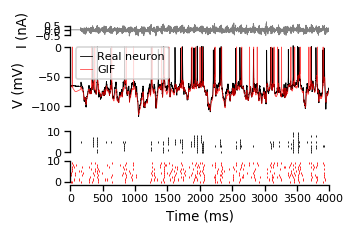

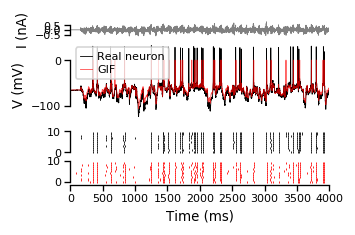

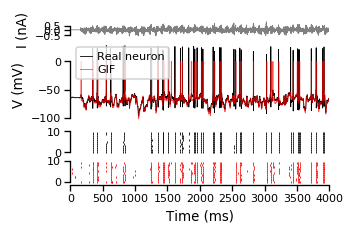

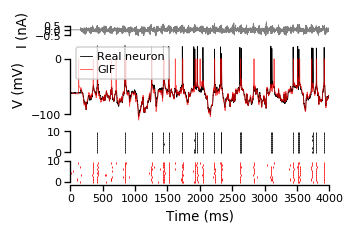

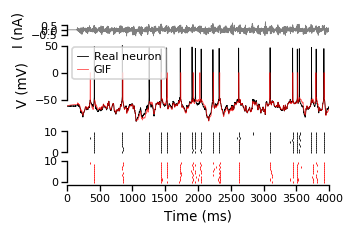

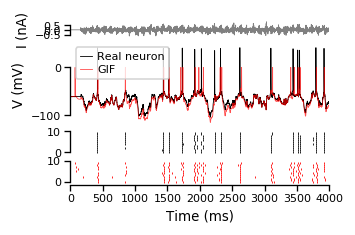

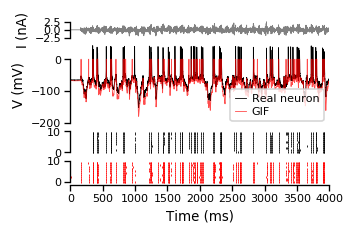

In [9]:
for i in range(sample_traces['mPFC'].shape[0]):
    sample_trace_plot(
        sample_traces['mPFC'], (0, 4000), 'mPFC_GIFs', 'GIF', 'r', 
        '{}_sample_trace_{}.png'.format('mPFC_GIFs', i)
    )

## GABA sample traces

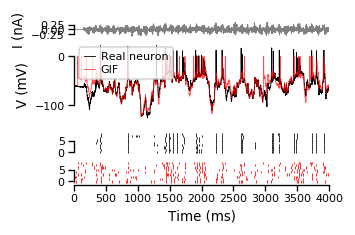

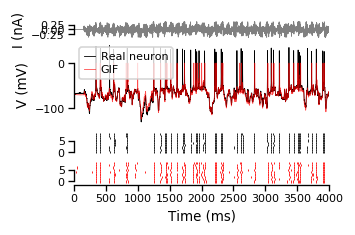

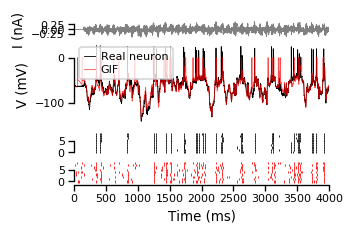

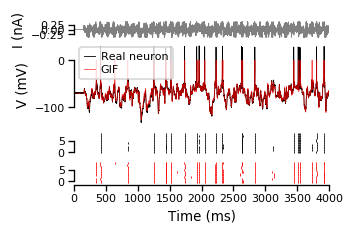

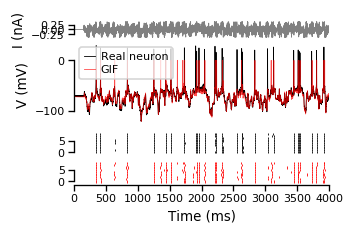

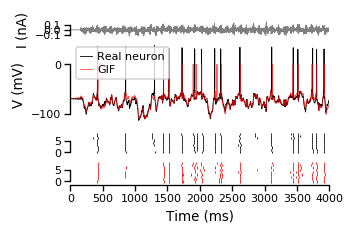

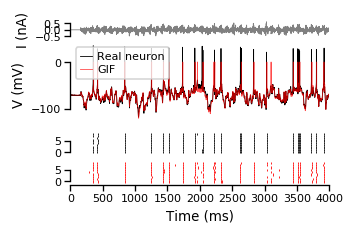

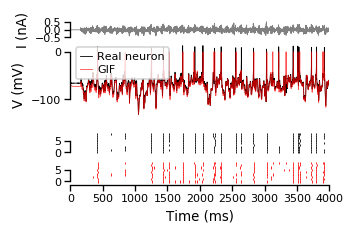

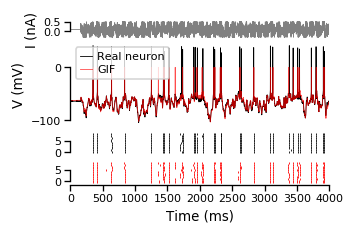

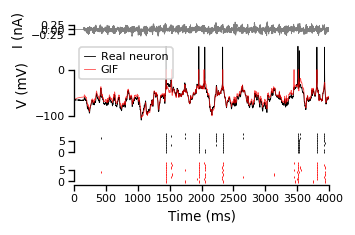

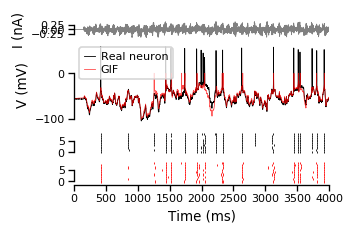

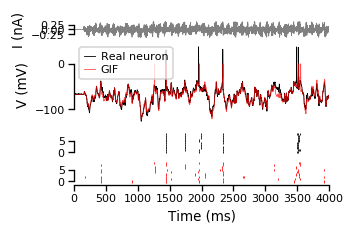

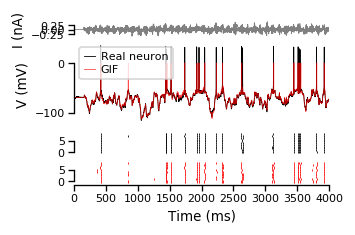

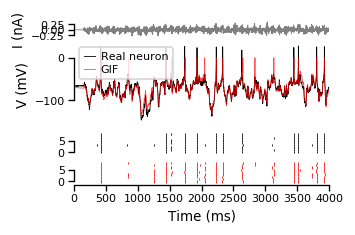

In [10]:
for i in range(sample_traces['GABA'].shape[0]):
    sample_trace_plot(
        sample_traces['GABA'], (0, 4000), 'GABA_GIFs', 'GIF', 'r', 
        '{}_sample_trace_{}.png'.format('GABA_GIFs', i)
    )

## 5HT sample traces

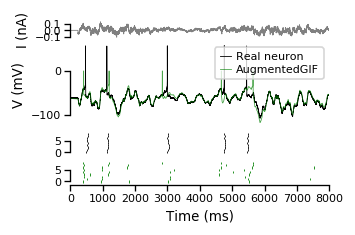

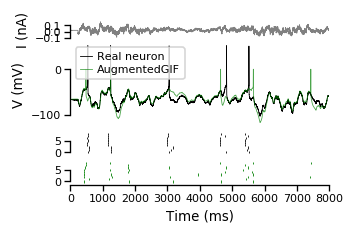

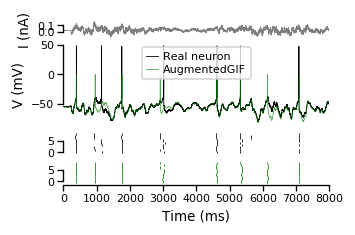

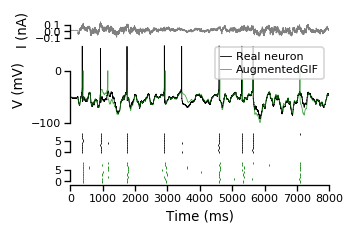

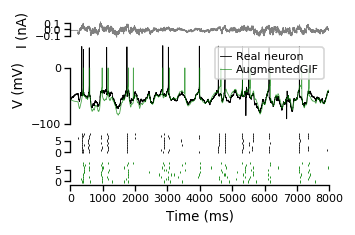

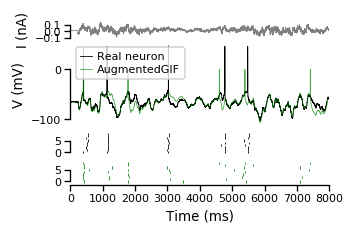

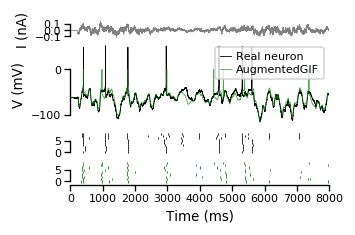

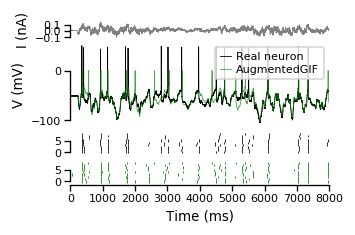

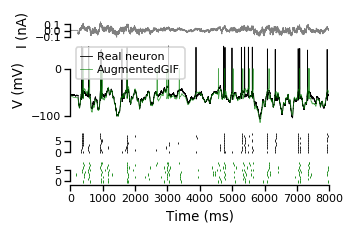

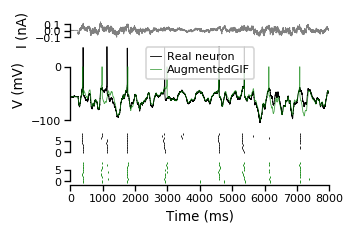

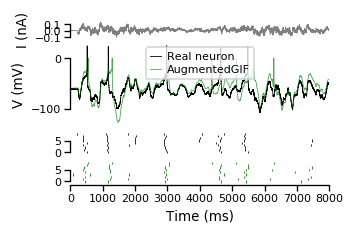

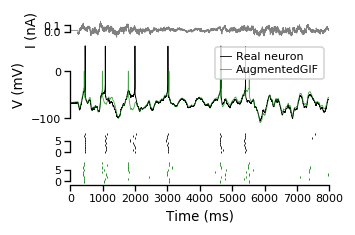

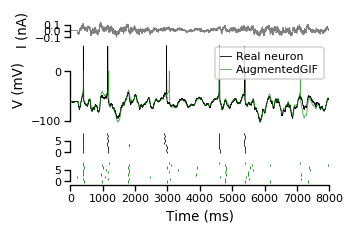

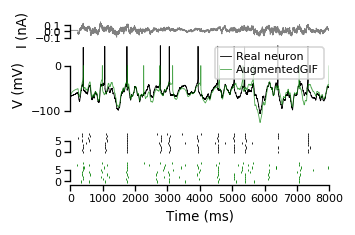

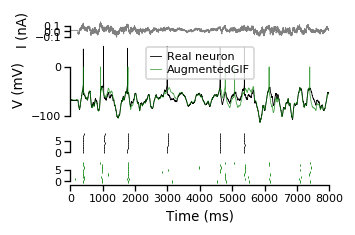

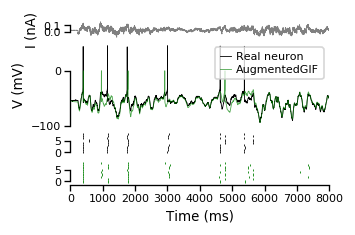

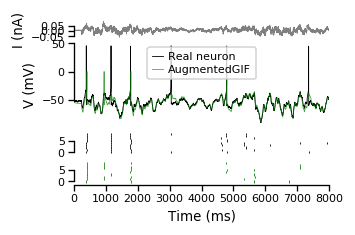

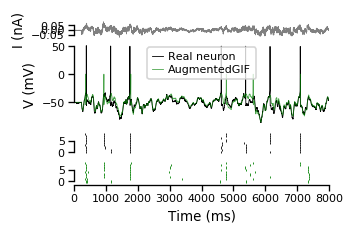

In [11]:
for i in range(sample_traces['5HT'].shape[0]):
    sample_trace_plot(
        sample_traces['5HT'], (0, 8000), '5HT_AugmentedGIFs', 'AugmentedGIF', 'g',
        '{}_sample_trace_{}.png'.format('5HT_AugmentedGIFs', i)
    )